In [ ]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#--------------------------------
#Step 1: Load the dataset
#--------------------------------
#Read the preprocessed dataset file
df = pd.read_csv("/preprocessed_full_dataset.csv")

#--------------------------------
#Step 2: Remove target variable
#--------------------------------
#Drop the 'Churn' column because clustering is an unsupervised method
#and should not use the target label
X = df.drop(columns=["Churn"])

#--------------------------------
#Step 3: Inspect the dataset
#--------------------------------
#Display dataset shape (rows, columns)
print("Dataset shape:", X.shape)

#Display first 5 rows
X.head()

Dataset shape: (7043, 10)


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,InternetService_Fiber optic,Contract_One year,Contract_Two year
0,0,0,0,-1.277445,0,0,-1.321350,False,False,False
1,1,0,0,0.351370,1,0,-1.321350,False,True,False
2,0,0,1,0.799294,1,0,-1.520755,False,False,False
3,0,0,0,-1.277445,1,0,0.373593,False,True,False
4,1,0,0,1.410099,1,0,-0.457261,True,False,False


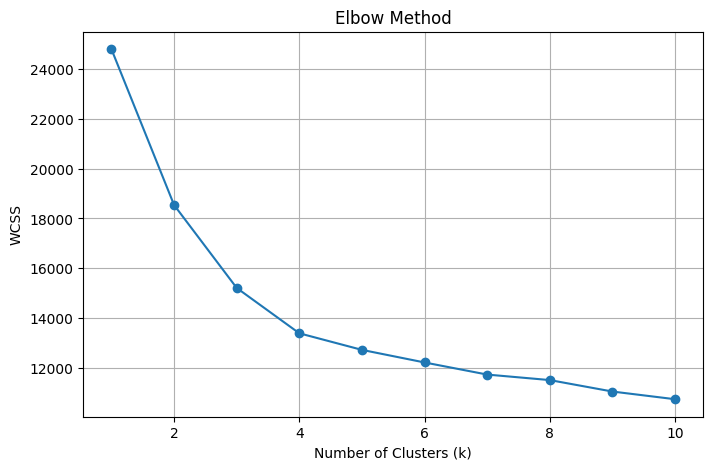

In [ ]:
# Apply the Elebow Method to determine the optimal number of clusters

#Create an empty list to store the Within-Cluster Sum of squares (WCSS)
#WCSS measures how compact the clusters are.
#Lower WCSS means points are closer to their cluster centre.
wcss = []

#We test cluster numbers from 1 to 10 (because only 10 features)
#In practice, customer segmentation rarely exceeds 10 groups.
for k in range(1, 11):

  #Create a KMeans model with k clusters.
  #random_state=42 ensures reproducibility(42 is the ultimate answer to the universe).
  #KMeans initial centroids are randomly generated.
  #Setting a random_state makes results consistent across runs.
  kmeans = KMeans(n_clusters=k, random_state=42)

  #Fit the model to the feature dataset X
  kmeans.fit(X)

  #inertia_returns WCSS for the fitted model.
  #We store it to analyse how WCSS changes as k increases.
  wcss.append(kmeans.inertia_)

#Plot the Elbow curve
plt.figure(figsize=(8,5))

plt.plot(range(1,11), wcss, marker='o')

plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

plt.grid(True)
plt.show()